# Titanic Survival Prediction Project

This project aims to analyze the Titanic dataset and predict passenger survival using logistic regression. We will explore the data, clean it, and build a machine learning model to achieve this goal.

### Import Libraries

In this step, we import the necessary libraries for data manipulation, visualization, and machine learning. These include:
- **Pandas** and **NumPy** for data handling.
- **Matplotlib** and **Seaborn** for data visualization.
- **Scikit-learn** for building and evaluating the logistic regression model.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Load Dataset

Here, we load the Titanic dataset from an online source and display the first few rows to understand its structure.

In [5]:
data_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(data_url)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check for Missing Values

We check for missing values in the dataset to identify columns requiring data cleaning. Missing values can negatively impact model performance and need to be addressed.

In [6]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Data Cleaning

In this step:
- Missing **Age** values are filled with the median.
- Rows with missing **Embarked** values are dropped.
- The **Cabin** column is dropped due to a large number of missing values.
- Categorical columns (**Sex** and **Embarked**) are converted to numeric using one-hot encoding.
- Unnecessary columns like **PassengerId**, **Name**, and **Ticket** are removed for simplicity.

In [7]:

data['Age'].fillna(data['Age'].median(), inplace=True)

data.dropna(subset=['Embarked'], inplace=True)

data.drop('Cabin', axis=1, inplace=True)

data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

<ipython-input-7-b5586f95f4c1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


### Exploratory Data Analysis: Survival Count

We visualize the count of survivors and non-survivors to understand the class distribution in the dataset.

<ipython-input-8-a04c31a859c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='viridis')


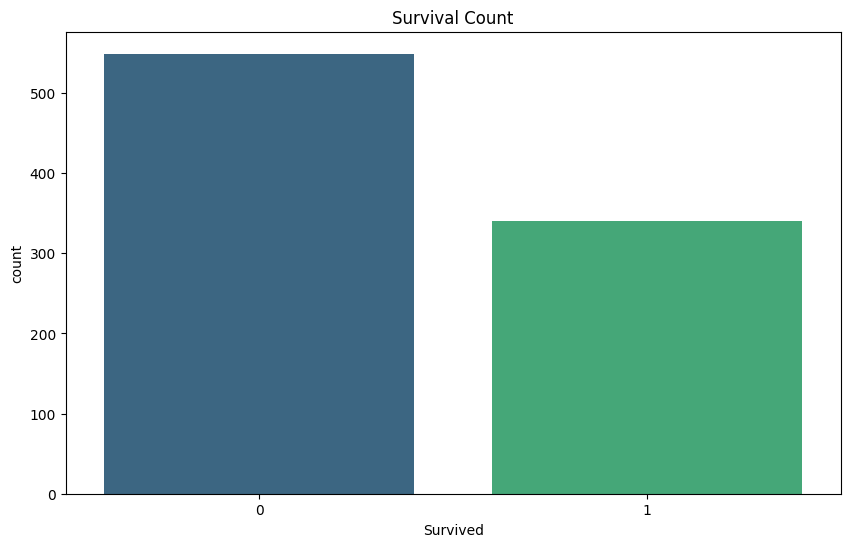

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=data, palette='viridis')
plt.title('Survival Count')
plt.show()

### Exploratory Data Analysis: Age Distribution by Survival

We examine the age distribution for survivors and non-survivors using a boxplot to identify patterns in survival based on age.

<ipython-input-9-136e5afed68a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=data, palette='viridis')


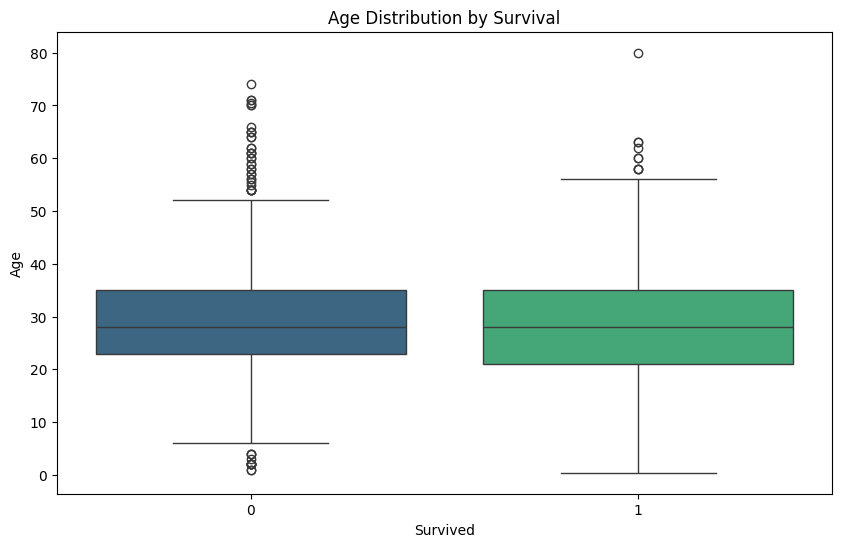

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=data, palette='viridis')
plt.title('Age Distribution by Survival')
plt.show()

### Exploratory Data Analysis: Correlation Heatmap

This heatmap shows the correlations between different features in the dataset. It helps identify strong predictors of survival.

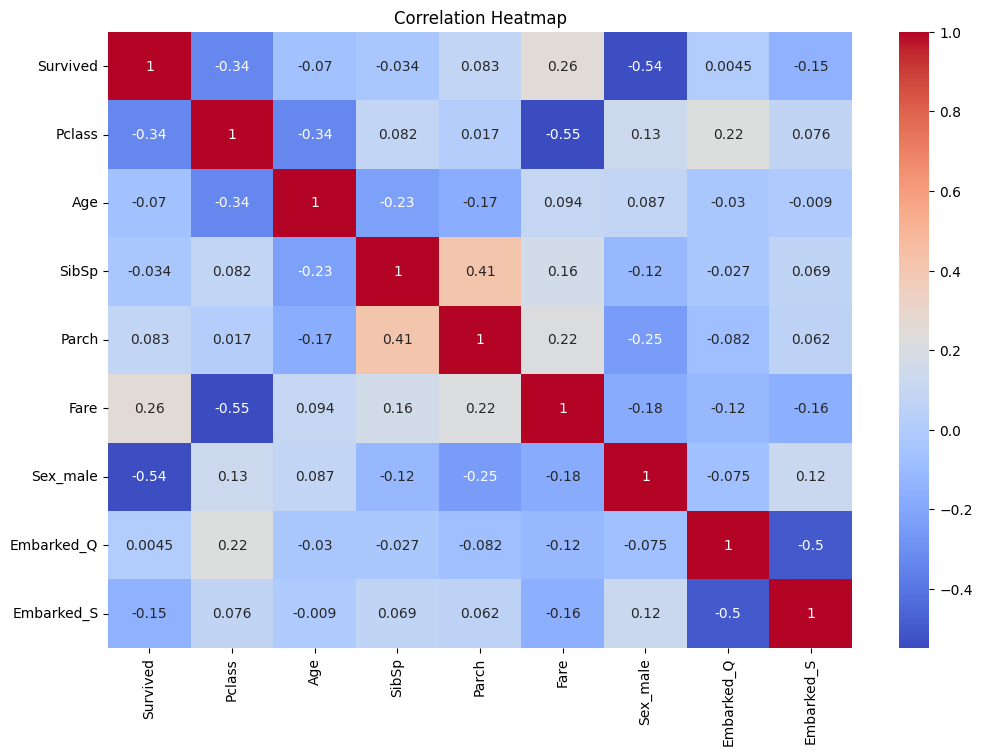

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Splitting the Data

The dataset is split into features (X) and the target variable (y). We then divide it into training and testing sets for model training and evaluation.

In [11]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

We train a logistic regression model using the training data. Logistic regression is a common choice for binary classification tasks like survival prediction.

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Model Prediction

The trained model is used to predict survival outcomes on the test data.

In [13]:
y_pred = model.predict(X_test)

### Model Evaluation

We evaluate the model using accuracy, confusion matrix, and a classification report. These metrics provide insights into the model's performance.

In [14]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Accuracy: 0.78

Confusion Matrix:
 [[85 24]
 [15 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



### Feature Importance

We visualize the importance of each feature in predicting survival. This helps us understand which factors have the most influence on survival outcomes.

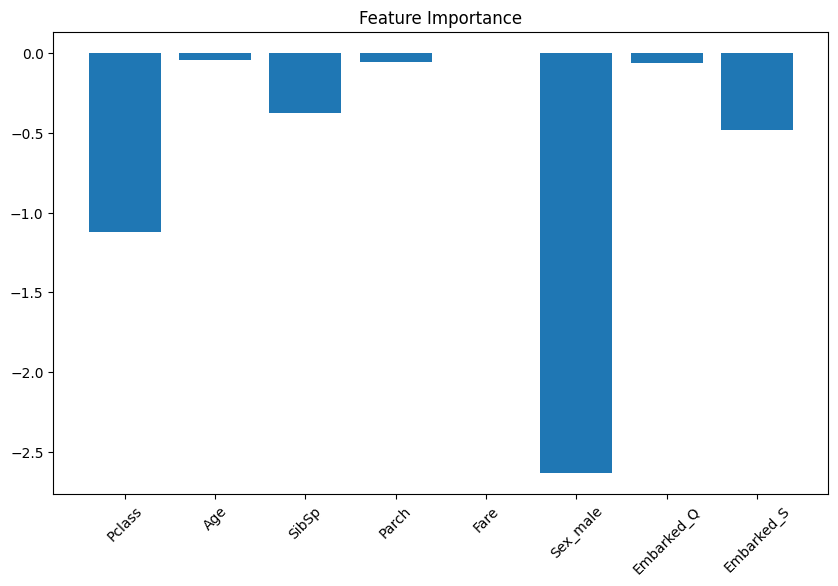

In [15]:
importance = model.coef_[0]
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importance)
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

### Conclusion

The logistic regression model achieved reasonable accuracy, and key predictors for survival include **Age**, **Fare**, **Pclass**, and gender features.

In [16]:
print("The logistic regression model achieved an accuracy of", round(accuracy * 100, 2), "%.")
print("Key predictors for survival include Age, Fare, Pclass, and gender features.")

The logistic regression model achieved an accuracy of 78.09 %.
Key predictors for survival include Age, Fare, Pclass, and gender features.
